# Python Data Visualization: Part 2

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Use `seaborn` to visualize scatter plot and line plot.
* Learn to create subplots.
* Gain familarity with customization and plotting styles. 
    
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
7. [Scatter Plot](#section7)
8. [Line Plot](#section8)
9. [Subplot](#section9)
10. [Customization](#section10)
11. [Demo: Change Plot Styles](#section11)
12. [Save Figures](#section12)

# Import Libraries and Load Dataset

In [1]:
# Import pandas and assign it to an alias `pd`
import pandas as pd

# Import numpy and assign it to an alias 'np'
import numpy as np

# Import matplotlib and assign it to an alias `mpl`
import matplotlib as mpl 

# Import matplotlib.pyplot and assign it to an alias `plt`
import matplotlib.pyplot as plt

# Import seaborn as assign to an alias `sns`
import seaborn as sns

Let's load the same `gm` dataset we've used in Part 1. 

In [2]:
gm = pd.read_csv('../data/gapminder.tsv', sep='\t')

<a id='section7'></a>

# Scatter Plot

In data science, we often need to plot the relationship between two variables. The most commonly used visualization tool for a bivariate plot is a scatter plot, in which we plot the individual data point, each corresponds to a value in x- and y- axis. The scatter plot usually uncovers the relationship between two varaibles, such as a positive or negative correlation. 

Let's say we are interested in exploring the relationship between GDP and life expectancy. What we want to plot on each axis also reveals our prediction about the relationship. If we choose to plot GDP on the x-axis, naturally, it means that we are interested to know if GDP would predict life expectancy. 

The function `sns.scatterplot` is pretty intuitive. What we need to do is to pass in values for the `x` and `y` parameter. 

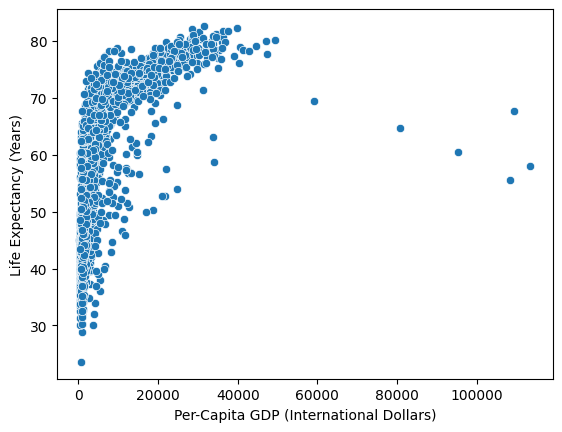

In [3]:
sns.scatterplot(data=gm, x='gdpPercap', y='lifeExp')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (Years)');

The scatter plot reveals a somewhat complex relationship between GDP and life expectancy. Note that both variables are not on the same **scale**, the GDP data is much larger than life expectancy data.

Let's log-transform the GDP data, as did previously, so that both variables have comparable measurements. 

In [4]:
gm['loggdp'] = np.log(gm['gdpPercap'])

Let's plot the scatter plot again to see if there's any pattern that could be read easily. 

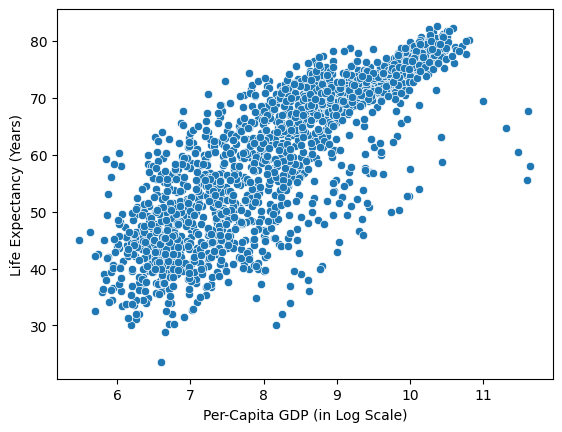

In [5]:
sns.scatterplot(data=gm, x='loggdp', y='lifeExp')
plt.xlabel('Per-Capita GDP (in Log Scale)')
plt.ylabel('Life Expectancy (Years)');

If you'd rather not transforming the data, we could also use the function `plt.xscale()` to convert the GDP data to log scale without directly modifying the data.

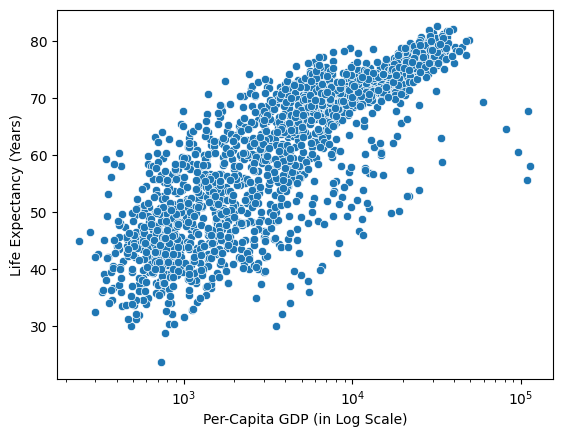

In [6]:
sns.scatterplot(data=gm, x='gdpPercap', y='lifeExp')
plt.xscale('log')
plt.xlabel('Per-Capita GDP (in Log Scale)')
plt.ylabel('Life Expectancy (Years)');

## Overplotting

Now we have a more interpretable scatter plot, showing a positive relationship between GDP and life expectancy.

What is lacking in this plot is that there are so many data points clustered together. It is difficult to easily identify each individual data point within this dense cluster of data. One simple solution is to adjust the transparency of the circles, allowing us to distinguish overlapping areas. 

Let's again take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of `sns.scatterplot`. The parameter we are looking for is `alpha`. 

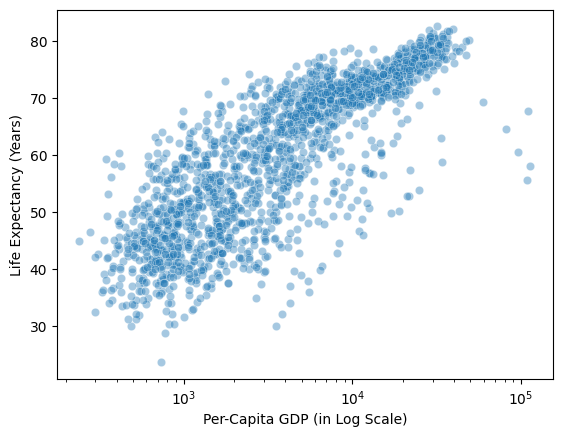

In [7]:
sns.scatterplot(data=gm, 
                x='gdpPercap', 
                y='lifeExp', 
                alpha=0.4) # adjust the transparency 
plt.xscale('log')
plt.xlabel('Per-Capita GDP (in Log Scale)')
plt.ylabel('Life Expectancy (Years)');

Of course, we can also adjust the size or shape the marker, making it smaller to avoid overlap. Here, we change the marker from circle to dot. 

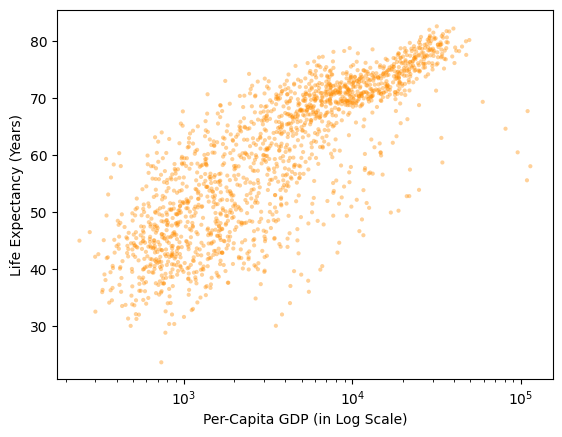

In [8]:
sns.scatterplot(data=gm, 
                x='gdpPercap', 
                y='lifeExp', 
                alpha=0.4, # adjust the transparency
                marker='.', # change marker style
                facecolor='darkorange', # change marker color - face
                edgecolor='None') # change marker color - edge
plt.xscale('log')
plt.xlabel('Per-Capita GDP (in Log Scale)')
plt.ylabel('Life Expectancy (Years)');

## Joint Plot

Now we have a more interpretable and informative scatter plot. What typically added on to the scatter plot is the distribution of each variable, known as a jointplot.

You can think it of a scatter plot plus histogram for each variable, so that at least we will have three pieces of information in mind:

- The distribution of GDP
- The distribution of life expectancy
- The relationship between GDP and life expectancy

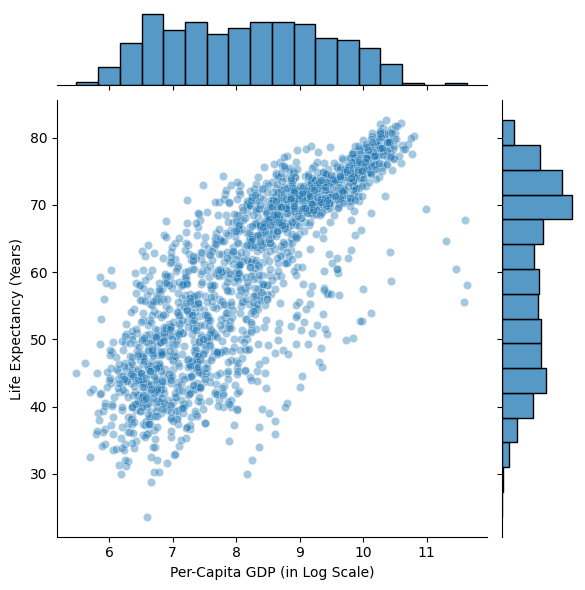

In [9]:
g = sns.jointplot(data=gm, 
           x='loggdp', 
           y='lifeExp',
           alpha=0.4
          )
g.ax_joint.set_xlabel('Per-Capita GDP (in Log Scale)')
g.ax_joint.set_ylabel('Life Expectancy (Years)');

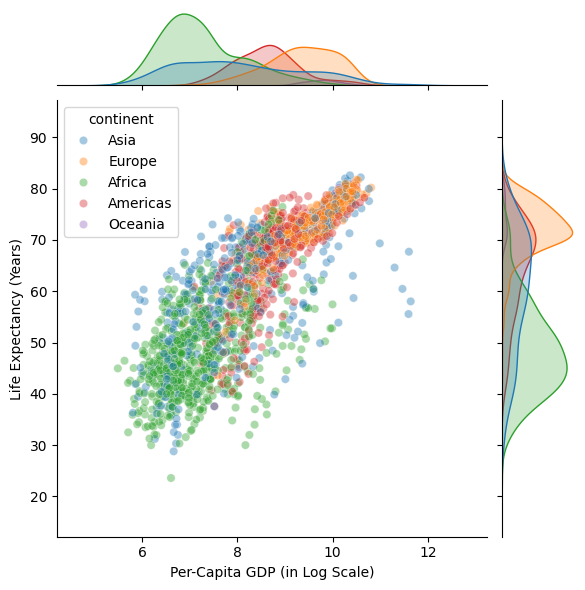

In [10]:
g = sns.jointplot(data=gm, 
           x='loggdp', 
           y='lifeExp',
           alpha=0.4,
           hue="continent")
g.ax_joint.set_xlabel('Per-Capita GDP (in Log Scale)')
g.ax_joint.set_ylabel('Life Expectancy (Years)');

## 🥊 Challenge 4: Add Conditional Colors

We chose to plot all data points together in one jointplot. Read the [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) of `sns.jointplot` and find the parameter that assign data points different colors based on its continent.

HINT: We've encountered the parameter many times!

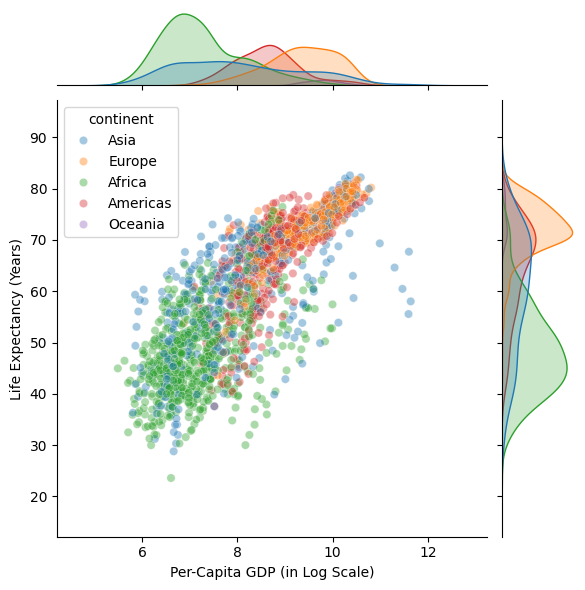

In [11]:

# YOUR CODE HERE
g = sns.jointplot(data=gm, 
           x='loggdp', 
           y='lifeExp',
           alpha=0.4,
           hue="continent")
g.ax_joint.set_xlabel('Per-Capita GDP (in Log Scale)')
g.ax_joint.set_ylabel('Life Expectancy (Years)');

<a id='section8'></a>

# Line Plot

So far, we've learned how to plot the relationship between two variables using a scatter plot. However, if one of the variables is categorical or represents time, a line plot is a more suitable tool for displaying the relationship.

When we have time on the x-axis, our interest lies in observing the changes in a variable. For instance, let's consider examining how life expectancy changes across the time span from 1950 to 2007.

We first create two dataframes, subselecting countries that have the name `Portugal` or `Spain` from the original `gm` dataset using Boolean masking. Note the vertical bar represents the logical operation OR. 

In [12]:
countries = gm[(gm['country'] == 'Portugal') | (gm['country'] == 'Spain')]

Once the data is ready, we can move on to `sns.lineplot` to visualize the change of life Expectancy over time. 

`sns.lineplot` takes two arguments, we want `year` on the x-axis and `lifeExp` on the y-axis. As you probably know until now, we pass in `hue = country` to specify the grouping variable that produces lines with different colors. 

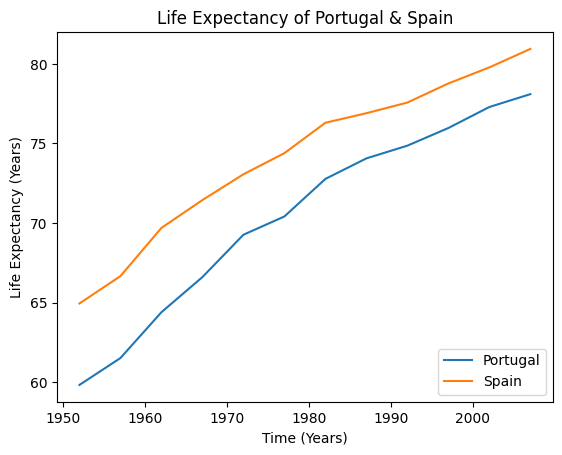

In [13]:
sns.lineplot(data=countries, x='year', y='lifeExp', hue='country')
plt.title('Life Expectancy of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(prop={'size': 10}, loc='lower right'); # specify the size and location of legend

## 🎬 **Demo**: Aggregate Data

The above line plot has one data point per year per country. What if we want to know how life expectancy changes over time for each continent? We will have more than one data point for per year as we have many countries in one continent. 

Still, we are able to have a glimpse of the relationship by aggregating all data points per year. 

Note in the following code block, we pass in the `gm` dataset and have `hue = continent`, same as the first line plot. 

Behind the scene, `Seaborn` automatically shows the aggregated line plot, and the method of aggregation, by default, is taking the mean. 

Alongside the confidence interval, showing the variation of expected life expectancy of each year for each continent. 

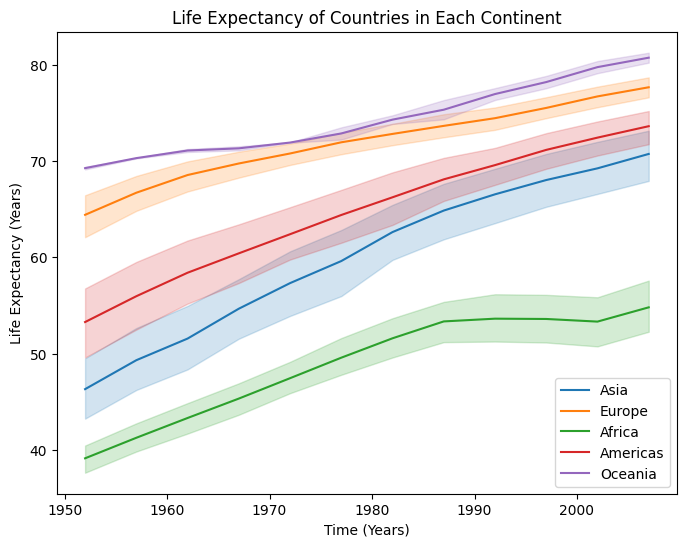

In [14]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=gm, x='year', y='lifeExp', hue='continent')
plt.title('Life Expectancy of Countries in Each Continent')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(prop={'size': 10}, loc='lower right');
plt.legend(prop={'size': 10}, loc='lower right');

## 🥊 Challenge 5: Change Marker 

Take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html) of `sns.lineplot`, find the parameters that 1) change the line style, and 2) show marker for each data point. 

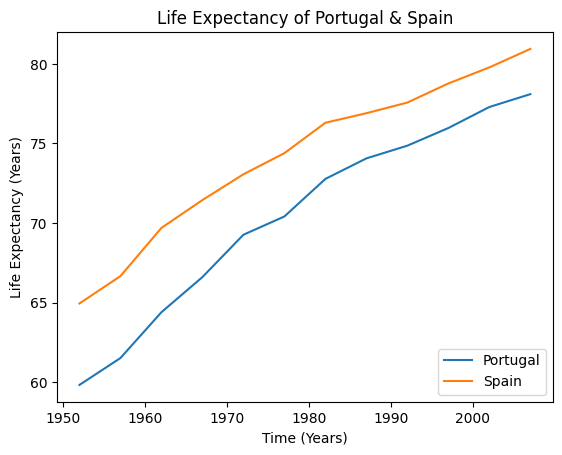

In [15]:

# YOUR CODE HERE
sns.lineplot(data=countries, x='year', y='lifeExp', hue='country', markers="o")
plt.title('Life Expectancy of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(prop={'size': 10}, loc='lower right');

<a id='section9'></a>

# Subplot

## `plt.subplot`

Subplots allow us to draw multiple plots within a single figure. 

To do so, we use `plt.subplot(<num_rows>, <num_cols>, <index>)` where the number of rows and columns we want in the figure are specified as the first two parameters, respectively. 

The `<index>` tells subplot which subplot subsequent calls to `plt` will draw in. It starts at `1` for the top left subplot, and increases across rows, and then down columns. 

Let's look at a simple example plotting Spain and Portugal's GDP on separate plots next to each other in the same row.

In [16]:
portugal = gm[(gm['country'] == 'Portugal')]
spain = gm[(gm['country'] == 'Spain')]

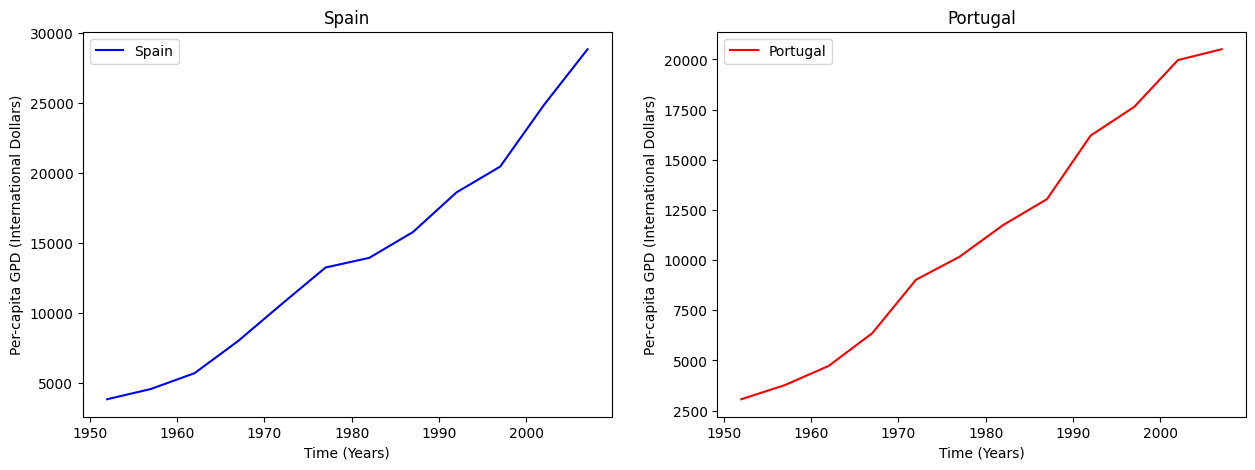

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1) # num of row: 1, num of col: 2, plot index: 1
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

plt.subplot(1, 2, 2) # num of row: 1, num of col: 2, plot index: 2
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (International Dollars)')
plt.legend();

🔔 **Question**: Notice any difference on the y-axis ?

## `sns.facetgrid`

We can of course use the seaborn equivalent to plot subplots! 

The function `sns.facetgrid` breaks the data up across multiple subplots, which ara arranged in the way specified by the user. 

In [18]:
countries.head()

,country,continent,year,lifeExp,pop,gdpPercap,loggdp
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867,8.028885
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743,8.236042
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889,8.461248
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993,8.758022
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417,9.107449


The first step of creating subplots is to assign the dataframe to `sns.facetgrid`, which returns a set of axes with no data.

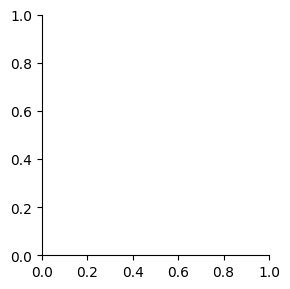

In [19]:
sns.FacetGrid(countries);

Let's take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html). There are three important variables--`row`, `col`, and `hue`, analogous to `plt.subplot`.

If we pass `col='country'`, we are asking `seaborn` to create columns based on groups/levels of the `country` column. 

In the `countries` dataframe, we have exactly two levels for `country`--`Portugal` and `Spain`, that's why we see two empty subplot arranged next to each other. 

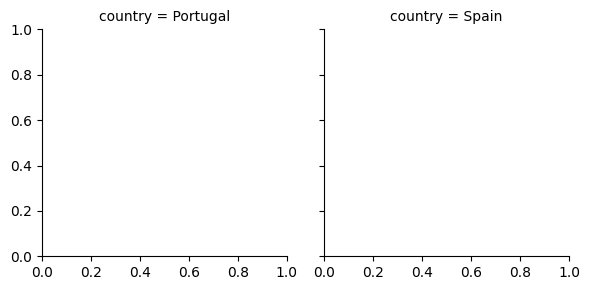

In [20]:
sns.FacetGrid(countries, col='country');

Note that we haven't yet specify what kind of data we want to show in the subplot. 

To do so, we first assign the empty subplots to a new variable `g`, and then use the `.map()` function to apply our selected plotting function to the axes.

An important difference is that subplots share the same x and y axes!

Let's go back to the [documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) of `sns.FacetGrid` again. The two parameters `sharex` and `sharey` are by default `True`. 

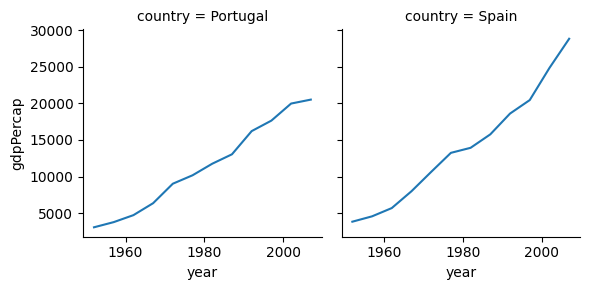

In [21]:
g = sns.FacetGrid(countries, col='country')
g.map(sns.lineplot, "year", "gdpPercap");

Let's add x and y labels to make the plot more informative! Since our plot is assigned to the variable `g`, let's use `.set_xlabels` function instead of using `plt.xlabel`. 

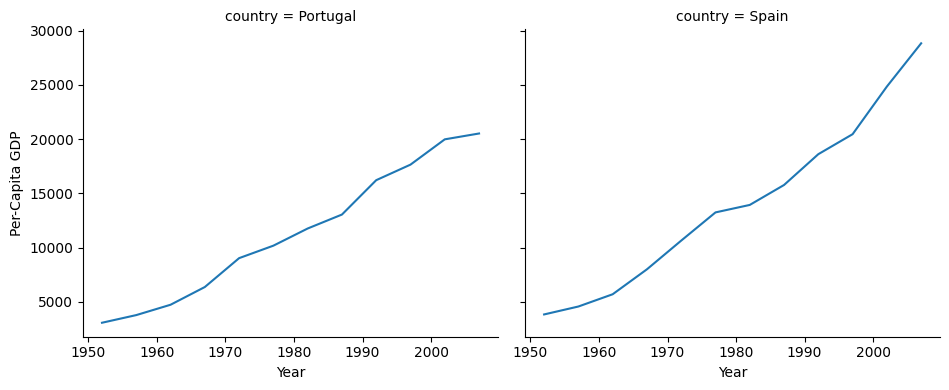

In [22]:
g = sns.FacetGrid(countries, col='country', height=4, aspect=1.2)
g.map(sns.lineplot, "year", "gdpPercap")
g.set_xlabels('Year')
g.set_ylabels('Per-Capita GDP');

## 🥊 Challenge 6: Final Challenge

Congratulations! We have covered the essential content of this workshop. The next challenge is designed to integrate the skills we've acquired into a single task.

The task is straightforward: based on our previous exercises, we've established a positive relationship between log GDP and life expectancy. However, do we observe this relationship for every individual year?

To tackle this, let's generate subplots using `sns.FacetGrid`, with each subplot corresponding to a specific year. Furthermore, within each of these plots, utilize color to distinguish data from different continents.

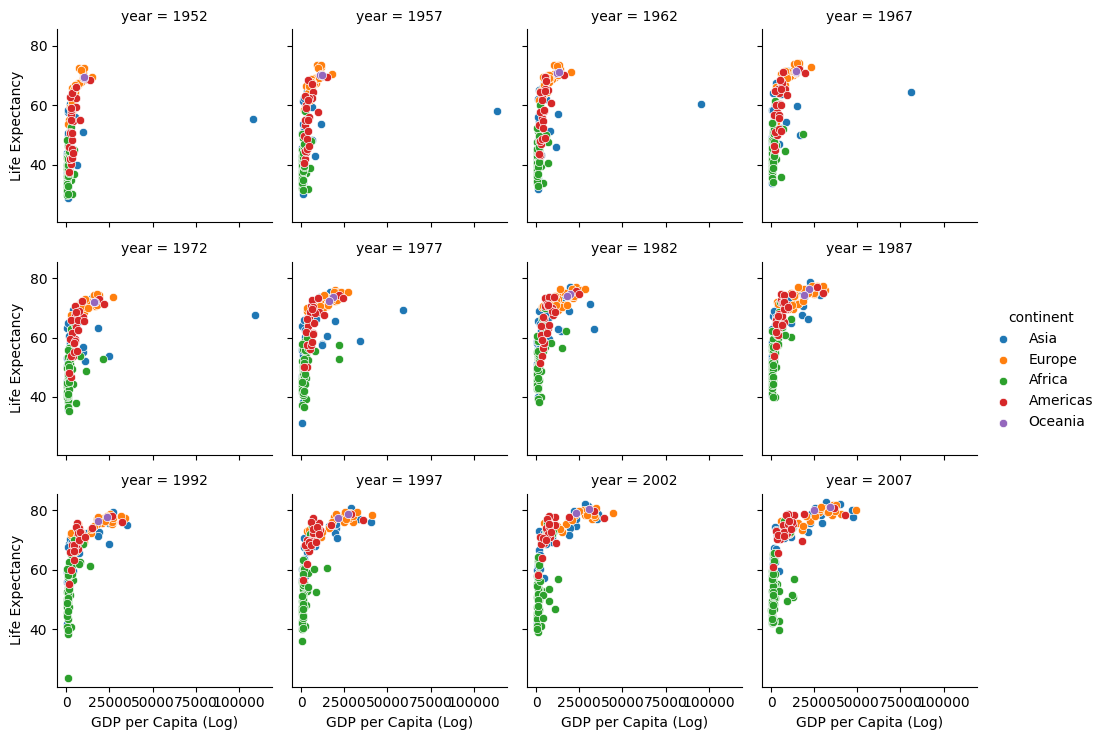

In [26]:
# starter code

g = sns.FacetGrid(gm, 
                  col= "year",
                  hue= "continent",
                  col_wrap= 4,
                  height=2.5 )
g.map(sns.scatterplot, "gdpPercap", "lifeExp"  )
g.set_xlabels("GDP per Capita (Log)")
g.set_ylabels("Life Expectancy")
g.add_legend();

<a id='section10'></a>

# Customization

We've already touched upon the idea of plot customization along the workshop. To recap, so far, we have experimented with functions to change figure size, change marker color and color opacity. 

There are built-in collections of style sheets that allow for a quick and easy way to get nice looking plots in a particular style. To use a style sheet you simply call the `plt.style.use()` function and give it the name of the style sheet you want to use. 

## [Style Sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

- ggplot
- bmh
- fivethirtyeight

For more on style sheets print all available style sheets using `plt.style.available`, or see the ([documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html)).

In addition to style sheets, we can also apply style libraries that are not built-in by the plotting library but created by others. For instance, `SciencePlots` is the one that adopts the plotting style frequently seen in journal articles.

These libraries, like any other python libraries, need to be installed first. 

## Style Libraries

- [py.scienceplots](https://pypi.org/project/SciencePlots/)

<a id='section11'></a>

## 🎬 **Demo**: Change Plot Styles

In this demo, we will walk through applying style sheets and style libraries mentioned above.

The `ggplot` style sheet emulates the ggplot package in R. 

In [28]:
gm_latest = gm[gm['year'] == 2007]

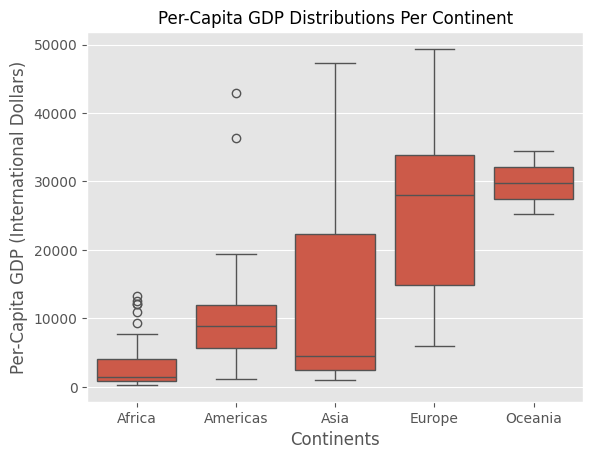

In [29]:
plt.style.use('ggplot')
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

The `bmh` style, is adpated from the Bayesian Methods for Hackers book.

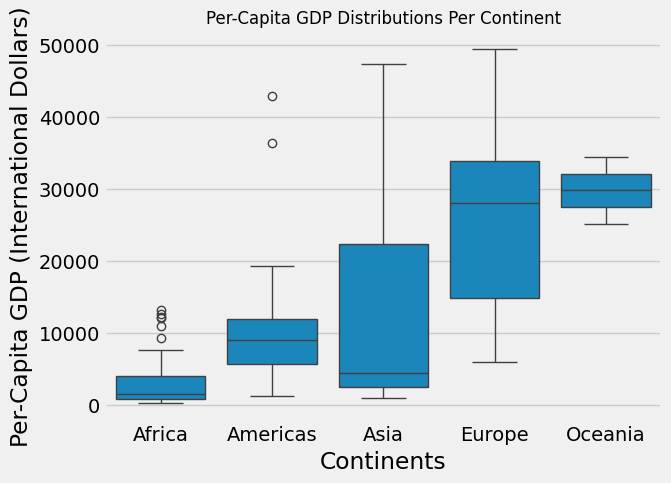

In [30]:
plt.style.use('default')
plt.style.use('fivethirtyeight')
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

To use the plotting library `SciencePlots`, let install it with `!pip`.

In [31]:
!pip install SciencePlots

In [32]:
import Scienceplots
plt.style.use('default')
plt.style.use(['science', 'notebook'])

ModuleNotFoundError: No module named 'Scienceplots'

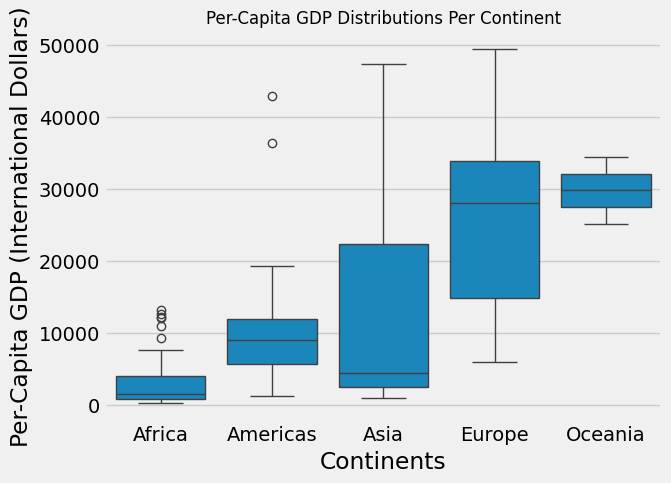

In [33]:
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

<a id='section12'></a>

# Save Figures

Finally, if you'd like to save a plot you can use the `plt.savefig` function that is part of the matplotlib package. This will create an image file saved to wherever you specify. Running the cell below will save the plot as `boxplot.png` within the data directory.

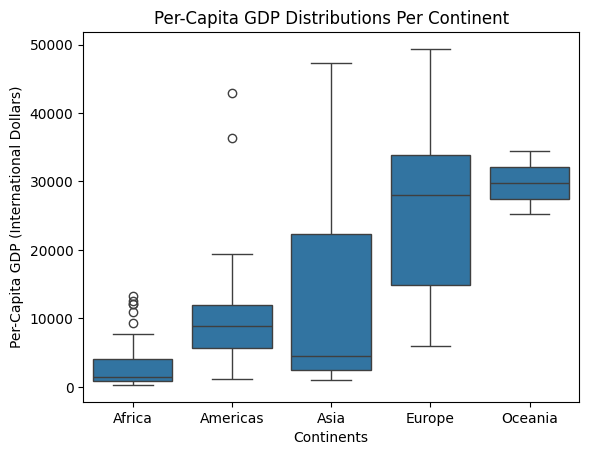

In [34]:
plt.style.use('default')
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)')
plt.savefig('../data/boxplot.png', dpi=150);


# Going further

There are many visualization libraries in Python and you now have experience in using two popular ones.

Several other Python visualization libraries exist for creating *interactive* visualizations such as [Plotly](https://plot.ly/python/), [Bokeh](http://bokeh.pydata.org/en/latest/), or [Toyplot](http://toyplot.readthedocs.org/en/stable/tutorial.html#getting-started).

<div class="alert alert-success">

## ❗ Key Points

* Examine the data carefully and see if there's any variable that needs to be transformed. 
* Align subplots on the same scale is important for readers to interpret the results. 
* Apply style sheets if necessary. 

</div>